### Neural Networks

In [2]:
import newftrs as new_features
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

/Users/ashwin/python-getting-started/py2virtual/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
downs, togos, togoals, ptdiffs, quarters, shotguns, teams, seasons, isHomes, opponents, lastszns, last800s, lastPlays, def800s, isPasses = new_features.get()

/Users/ashwin/python-getting-started/py2virtual/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (10,19) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [58]:
inputs = {'downs': downs, 'togos': togos, 'togoals': togoals, 'ptdiffs': ptdiffs, 
          'quarters': quarters, 'shotguns': shotguns, 'teams': teams, 'seasons': seasons,
          'isHomes': isHomes, 'opponents': opponents, 'lastszns': lastszns, 'last800s': last800s, 'lastPlays': lastPlays, 
          'def800s': def800s}



In [24]:
print(inputlist.shape)

(14, 367465)


In [36]:
print(len(downs))
for el in inputs:
    print(el, inputs[el][0:5])

367465
('def800s', [0.5, 0.0, 0.5, 0.3333333333333333, 0.5])
('togos', [10, 6, 6, 11, 10])
('downs', [1, 2, 3, 3, 1])
('lastszns', [0, 0, 0, 0, 0])
('quarters', [1, 1, 1, 1, 1])
('togoals', [80, 76, 76, 81, 23])
('seasons', [2002, 2002, 2002, 2002, 2002])
('opponents', ['SF', 'SF', 'SF', 'SF', 'NYG'])
('lastPlays', [1, 0, 1, 0, 1])
('isHomes', [True, True, True, True, False])
('teams', ['NYG', 'NYG', 'NYG', 'NYG', 'SF'])
('shotguns', [0, 0, 0, 1, 0])
('last800s', [0.5, 0.0, 0.5, 0.3333333333333333, 0.5])
('ptdiffs', [0, 0, 0, 0, 0])


In [72]:
# text data mapping

from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence
teams_text = ' '.join(str(word) for word in teams)
opponents_text = ' '.join(str(word) for word in opponents)
teams_mapped = teams_text
opponents_mapped = opponents_text
vocab_size = 32
teams_result = hashing_trick(teams_mapped, vocab_size, hash_function='md5')
opponents_result = hashing_trick(opponents_mapped, vocab_size, hash_function='md5')
print(teams_result[200:220])
print(opponents_result[200:220])

[2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L]
[1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L]


In [73]:
# inputlist = np.asarray([downs, togos, togoals, ptdiffs, quarters, shotguns, teams_result, seasons, isHomes, opponents_result, lastszns, last800s, lastPlays, def800s])
inputlist = np.asarray([downs, togos, togoals, ptdiffs, quarters, shotguns, teams_result, seasons, isHomes, opponents_result, lastszns])

inputlist = np.asarray(inputlist)
inputlist = np.transpose(inputlist)
print(inputlist.shape[1])

11


In [74]:
# create model
model = Sequential()
model.add(Dense(8, input_dim=inputlist.shape[1], activation='relu'))
# model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
# Split the data into training and testing data
print(inputlist.shape)
percent_testing = 0.30 # percent of dataset to set aside for testing
split = int(round((1-percent_testing)*inputlist.shape[0]))
print(split)
train_inputs = inputlist[:split, :]
test_inputs = inputlist[split:, :]
train_outputs = isPasses[:split]
test_outputs = isPasses[split:]

(367465, 11)
257225


In [64]:
for i in range(5):
    print(train_inputs[i][0:14])

[1.000e+00 1.000e+01 8.000e+01 0.000e+00 1.000e+00 0.000e+00 1.300e+01
 2.002e+03 1.000e+00 1.500e+01 0.000e+00 5.000e-01 1.000e+00 5.000e-01]
[2.000e+00 6.000e+00 7.600e+01 0.000e+00 1.000e+00 0.000e+00 1.300e+01
 2.002e+03 1.000e+00 1.500e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
[3.000e+00 6.000e+00 7.600e+01 0.000e+00 1.000e+00 0.000e+00 1.300e+01
 2.002e+03 1.000e+00 1.500e+01 0.000e+00 5.000e-01 1.000e+00 5.000e-01]
[3.00000000e+00 1.10000000e+01 8.10000000e+01 0.00000000e+00
 1.00000000e+00 1.00000000e+00 1.30000000e+01 2.00200000e+03
 1.00000000e+00 1.50000000e+01 0.00000000e+00 3.33333333e-01
 0.00000000e+00 3.33333333e-01]
[1.000e+00 1.000e+01 2.300e+01 0.000e+00 1.000e+00 0.000e+00 1.500e+01
 2.002e+03 0.000e+00 1.300e+01 0.000e+00 5.000e-01 1.000e+00 5.000e-01]


In [76]:
# Train the model
# CHANGE epochs to 150

model.fit(x=train_inputs, y=train_outputs, epochs=4, batch_size=10, validation_split=0.2)

Train on 205780 samples, validate on 51445 samples
Epoch 1/4
205780/205780 [==============================] - 27s 133us/step - loss: 8.3431 - acc: 0.4824 - val_loss: 8.4869 - val_acc: 0.4735 6s - loss: 8.
Epoch 2/4
205780/205780 [==============================] - 27s 131us/step - loss: 8.3431 - acc: 0.4824 - val_loss: 8.4869 - val_acc: 0.4735TA: 1s - loss: 8.3475  - ETA: 1s - loss: 8
Epoch 3/4
205780/205780 [==============================] - 26s 127us/step - loss: 8.3431 - acc: 0.4824 - val_loss: 8.4869 - val_acc: 0.4735
Epoch 4/4
205780/205780 [==============================] - 26s 125us/step - loss: 8.3431 - acc: 0.4824 - val_loss: 8.4869 - val_acc: 0.4735 loss: 8.3467 - acc: 0 - ETA: 2s - loss: 8


In [77]:
# evaluate the model
scores = model.evaluate(test_inputs, test_outputs)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

110240/110240 [==============================] - 2s 17us/step

acc: 59.69%


In [13]:
# 3 epochs = 64.78%

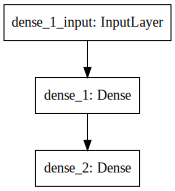

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))